In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from datetime import datetime



In [2]:
# Define the stock tickers and the date range for data extraction
tickers = ['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'XOM', 'NVDA', 'PFE', 'KO', 'TSLA']
start_date = '2013-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date

In [3]:
# Define the stock tickers and the date range for data extraction
tickers = ['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'XOM', 'NVDA', 'PFE', 'KO', 'TSLA']
start_date = '2013-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date

In [4]:
# Extract historical stock data from Yahoo Finance for each ticker
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Display the first few rows of the extracted data for each ticker
for ticker in tickers:
    print(f"\nData for {ticker}:")
    print(stock_data[ticker].head())


Data for AAPL:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725040  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513929  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053938  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959509  484156400
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002457  458707200

Data for MSFT:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  27.250000  27.730000  27.150000  27.620001  22.492275  52899300
2013-01-03  27.629999  27.650000  27.160000  27.250000  22.190971  48294400
2013-01-04  27.270000  27.340000  26.730000  26.740000  21.775652  52521100
2013-01-07  26.770000  26.879999  26.639999  26.6

In [6]:
## Data Cleaning

In [7]:
# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data, axis=1, keys=tickers)

In [8]:
# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data, axis=1, keys=tickers)


In [9]:
# Display the combined data structure
print(combined_data.head())

                 AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725040  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513929  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053938  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959509  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002457  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37

In [10]:
# Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 AAPL  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
MSFT  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
JNJ   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
JPM   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
PG    Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
XOM   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
NVDA  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
PFE   Open         0
      High         0
      Low          0
      Close        0
  

In [11]:
# Display the first few rows of the cleaned data
print(combined_data.head())

                 AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725040  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513929  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053938  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959509  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002457  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37

In [12]:
!pip install prophet

In [13]:
from prophet import Prophet

In [14]:
combined_data_prophet = combined_data.copy()

In [15]:
combined_data_prophet.head()


AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725040  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513929  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053938  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959509  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002457  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37.110001   
2013-01-04  27.270000  27.340000  26.730000  26.740000  ...  37.520000   
2013-01-07  26.770000  26.879999  26.639999  26.690001  ...  37.099998   
2013-01-08  26.750000  26.790001  26.459999  26.549999  ...  36.910000   

                                                TSLA                      \
                Close  Adj Close    Volume      Open      High       Low   
Date                                                                       
2013-01-02  37.599998  26.194843  21872400  2.333333  2.363333  2.314000   
2013-01-03  37.599998  26.194843  16357900  2.345333  2.363333  2.316667   
2013-01-04  37.660000  26.236656  15311300  2.320000  2.320000  2.261333   
2013-01-07  37.299999  25.985846  14610200  2.320000  2.320000  2.260000   
2013-01-08  37.040001  25.804720  14324300  2.300000  2.300000  2.207333   

                                          
               Close Adj Close    Volume  
Date                                      
2013-01-02  2.357333  2.357333  17922000  
2013-01-03  2.318000  2.318000  11130000  
2013-01-04  2.293333  2.293333  10110000  
2013-01-07  2.289333  2.289333   6630000  
2013-01-08  2.245333  2.245333  19260000  

[5 rows x 60 columns]

In [16]:
combined_data_prophet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2893 entries, 2013-01-02 to 2024-07-01
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (AAPL, Open)       2893 non-null   float64
 1   (AAPL, High)       2893 non-null   float64
 2   (AAPL, Low)        2893 non-null   float64
 3   (AAPL, Close)      2893 non-null   float64
 4   (AAPL, Adj Close)  2893 non-null   float64
 5   (AAPL, Volume)     2893 non-null   int64  
 6   (MSFT, Open)       2893 non-null   float64
 7   (MSFT, High)       2893 non-null   float64
 8   (MSFT, Low)        2893 non-null   float64
 9   (MSFT, Close)      2893 non-null   float64
 10  (MSFT, Adj Close)  2893 non-null   float64
 11  (MSFT, Volume)     2893 non-null   int64  
 12  (JNJ, Open)        2893 non-null   float64
 13  (JNJ, High)        2893 non-null   float64
 14  (JNJ, Low)         2893 non-null   float64
 15  (JNJ, Close)       2893 non-null   float64
 16  (JNJ, 

In [17]:
#notes:
#m = Prophet(multiple_y=True)
#m.add_country_names(df, country_names=['y1', 'y2'])

In [18]:
# Rename columns to 'ds' and 'y'
combined_data_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [19]:
#prophet_data = combined_data_prophet.columns =["ds", "y"]

In [20]:
display(combined_data_prophet.head())
display(combined_data_prophet.tail())

AAPL                                                         \
                 Open       High        Low          y  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725040  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513929  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053938  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959509  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002457  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low          y  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37.110001   
2013-01-04  27.270000  27.340000  26.730000  26.740000  ...  37.520000   
2013-01-07  26.770000  26.879999  26.639999  26.690001  ...  37.099998   
2013-01-08  26.750000  26.790001  26.459999  26.549999  ...  36.910000   

                                                TSLA                      \
                    y  Adj Close    Volume      Open      High       Low   
Date                                                                       
2013-01-02  37.599998  26.194843  21872400  2.333333  2.363333  2.314000   
2013-01-03  37.599998  26.194843  16357900  2.345333  2.363333  2.316667   
2013-01-04  37.660000  26.236656  15311300  2.320000  2.320000  2.261333   
2013-01-07  37.299999  25.985846  14610200  2.320000  2.320000  2.260000   
2013-01-08  37.040001  25.804720  14324300  2.300000  2.300000  2.207333   

                                          
                   y Adj Close    Volume  
Date                                      
2013-01-02  2.357333  2.357333  17922000  
2013-01-03  2.318000  2.318000  11130000  
2013-01-04  2.293333  2.293333  10110000  
2013-01-07  2.289333  2.289333   6630000  
2013-01-08  2.245333  2.245333  19260000  

[5 rows x 60 columns]

AAPL                                                  \
                  Open        High         Low           y   Adj Close   
Date                                                                     
2024-06-25  209.149994  211.380005  208.610001  209.070007  209.070007   
2024-06-26  211.500000  214.860001  210.639999  213.250000  213.250000   
2024-06-27  214.690002  215.740005  212.350006  214.100006  214.100006   
2024-06-28  215.770004  216.070007  210.300003  210.619995  210.619995   
2024-07-01  212.089996  217.509995  211.919998  216.750000  216.750000   

                            MSFT                                      ...  \
              Volume        Open        High         Low           y  ...   
Date                                                                  ...   
2024-06-25  56713900  448.250000  451.420013  446.750000  450.950012  ...   
2024-06-26  66213200  449.000000  453.600006  448.190002  452.160004  ...   
2024-06-27  49772700  452.179993  456.170013  451.769989  452.850006  ...   
2024-06-28  82542700  453.070007  455.380005  446.410004  446.950012  ...   
2024-07-01  60402900  448.660004  457.369995  445.660004  456.730011  ...   

                   KO                                        TSLA              \
                  Low          y  Adj Close    Volume        Open        High   
Date                                                                            
2024-06-25  63.509998  63.840000  63.840000  10546800  184.399994  187.970001   
2024-06-26  63.230000  64.050003  64.050003   9402500  186.539993  197.759995   
2024-06-27  63.619999  63.910000  63.910000   8494100  195.169998  198.720001   
2024-06-28  63.520000  63.650002  63.650002  17358800  199.550003  203.199997   
2024-07-01  63.119999  63.279999  63.279999  10033400  201.020004  213.229996   

                                                           
                   Low           y   Adj Close     Volume  
Date                                                       
2024-06-25  182.009995  187.350006  187.350006   63678300  
2024-06-26  186.360001  196.369995  196.369995   95737100  
2024-06-27  194.050003  197.419998  197.419998   72746500  
2024-06-28  195.259995  197.880005  197.880005   95438100  
2024-07-01  200.850006  209.860001  209.860001  135691400  

[5 rows x 60 columns]

In [21]:
combined_data.columns = [f"{ticker}_{attr}" for ticker, attr in combined_data.columns]

In [22]:
combined_data.reset_index(inplace=True)

In [23]:
combined_data.head()

,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,...,KO_Low,KO_Close,KO_Adj Close,KO_Volume,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.725040,560518000,27.250000,27.730000,27.150000,...,36.660000,37.599998,26.194843,21872400,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.513929,352965200,27.629999,27.650000,27.160000,...,37.110001,37.599998,26.194843,16357900,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.053938,594333600,27.270000,27.340000,26.730000,...,37.520000,37.660000,26.236656,15311300,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,15.959509,484156400,26.770000,26.879999,26.639999,...,37.099998,37.299999,25.985846,14610200,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.002457,458707200,26.750000,26.790001,26.459999,...,36.910000,37.040001,25.804720,14324300,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [24]:
# Function to train and evaluate models for a given stock
def train_and_evaluate(ticker, combined_data):
    # Extract target variable (Close price of the given ticker) and features (all other columns)
    target_column = f'{ticker}_Close'
    y = combined_data[target_column].values
    ds = combined_data["Date"]
    
    prophet_df = pd.DataFrame({'ds': ds, 'y': y})
    
    model = Prophet() 
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=365)  # Forecasting for 1 year (365 days)
    forecast = model.predict(future)
   
    model.plot(forecast)
   # Display the underlying forecast dataframe (tail)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    
   # Reset the index to this datetime column so that our plot looks nice
    forecast = forecast.set_index('ds')

    # Display the DataFrame
    forecast.head()

    # Plot predictions for our forecast period
    forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-720:,:].plot()

    # Reset "ds" from the datetime index back to a column
    forecast = forecast.reset_index()
    forecast.head()

        # Reset "ds" from the datetime index back to a column
    forecast = forecast.reset_index()
    forecast.head()

    # Plot the individual time series components of the model
    fig2 = model.plot_components(forecast)


Evaluating models for AAPL


21:36:00 - cmdstanpy - INFO - Chain [1] start processing
21:36:01 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for MSFT


21:36:04 - cmdstanpy - INFO - Chain [1] start processing
21:36:05 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for JNJ


21:36:07 - cmdstanpy - INFO - Chain [1] start processing
21:36:08 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for JPM


21:36:10 - cmdstanpy - INFO - Chain [1] start processing
21:36:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for PG


21:36:14 - cmdstanpy - INFO - Chain [1] start processing
21:36:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for XOM


21:36:17 - cmdstanpy - INFO - Chain [1] start processing
21:36:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for NVDA


21:36:20 - cmdstanpy - INFO - Chain [1] start processing
21:36:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:152: RuntimeWarning: More than 20 figures have been opened. Figures created through 


Evaluating models for PFE


21:36:24 - cmdstanpy - INFO - Chain [1] start processing
21:36:25 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for KO


21:36:27 - cmdstanpy - INFO - Chain [1] start processing
21:36:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for TSLA


21:36:30 - cmdstanpy - INFO - Chain [1] start processing
21:36:31 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 

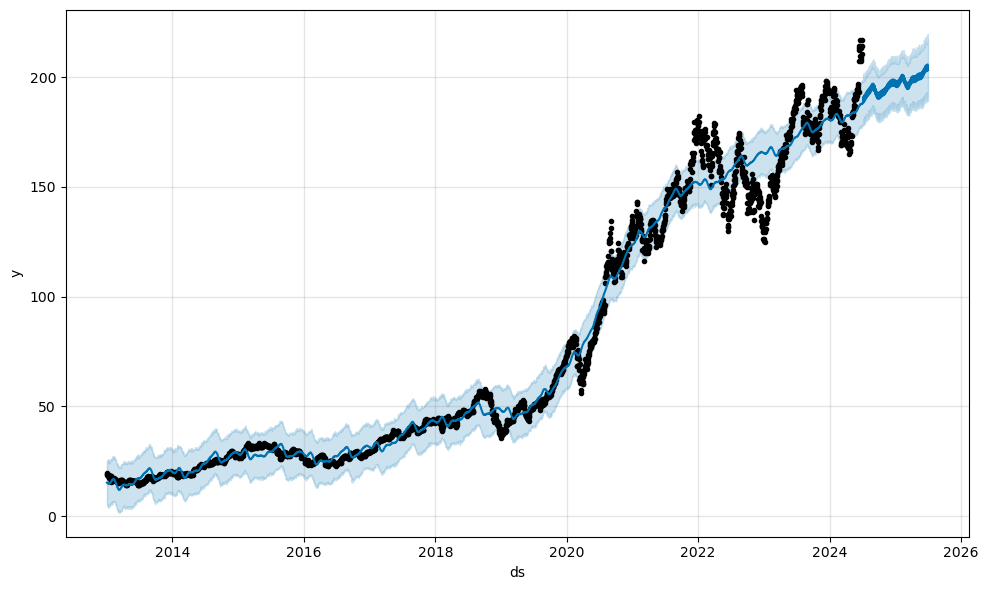

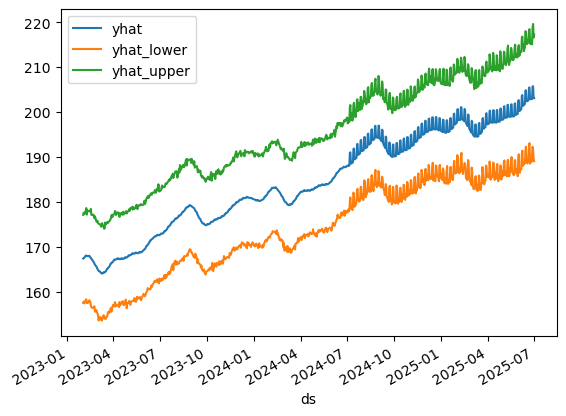

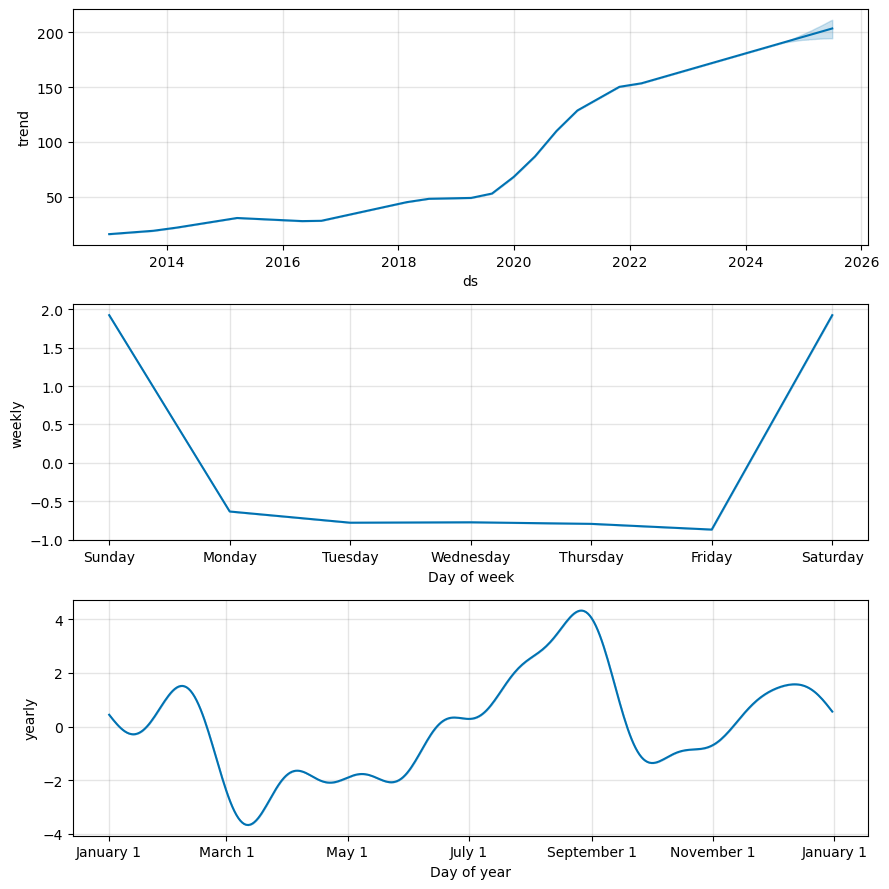

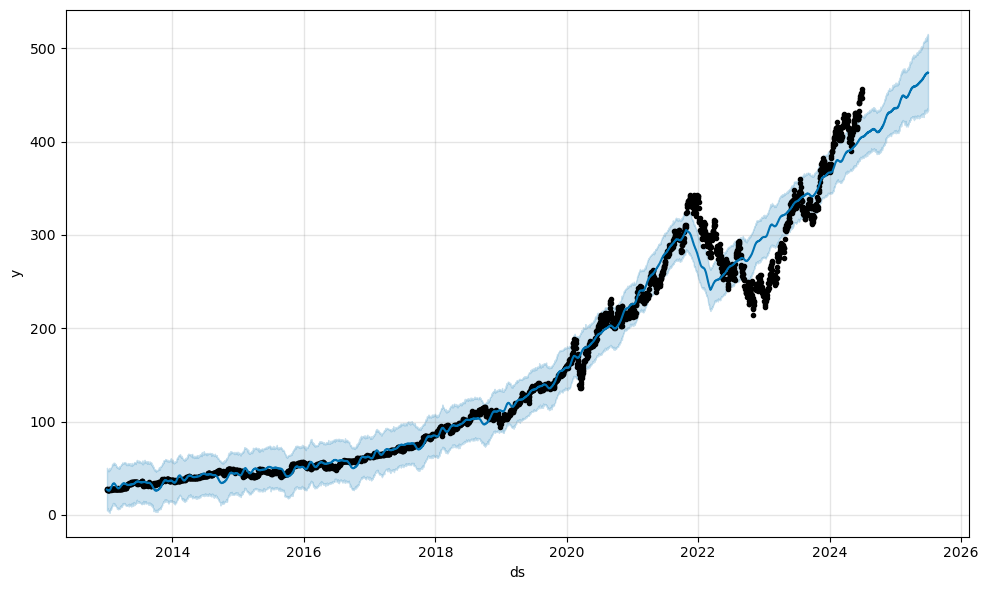

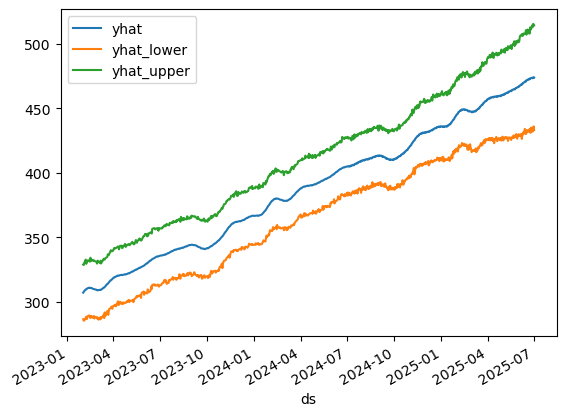

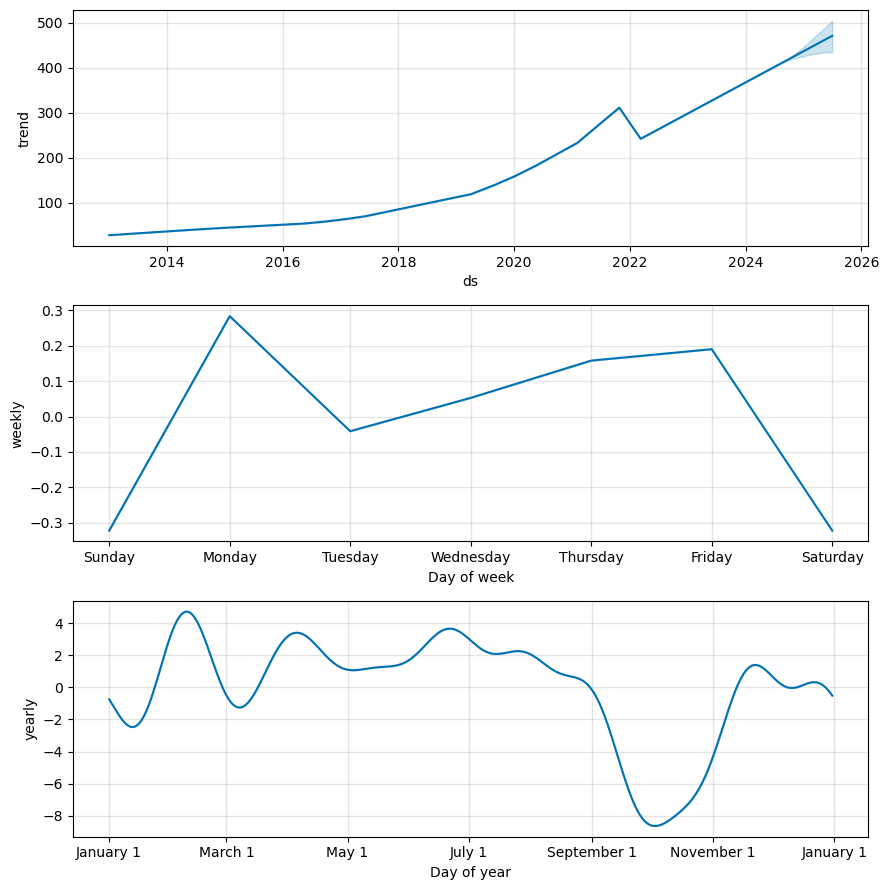

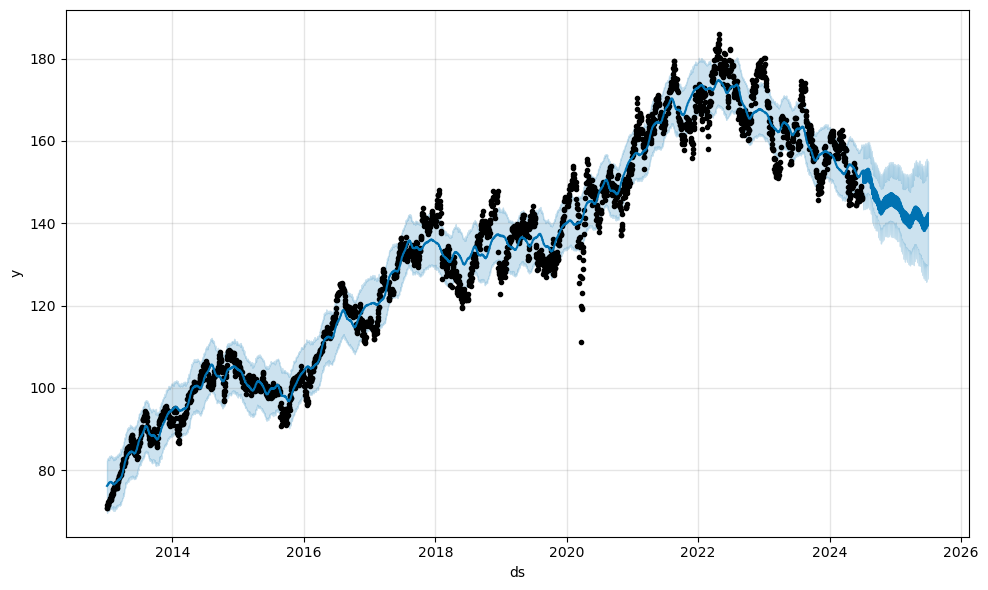

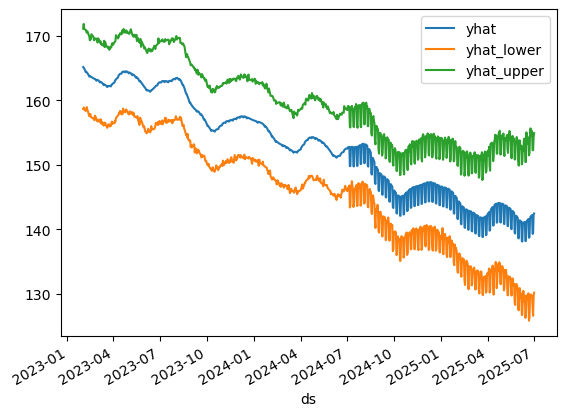

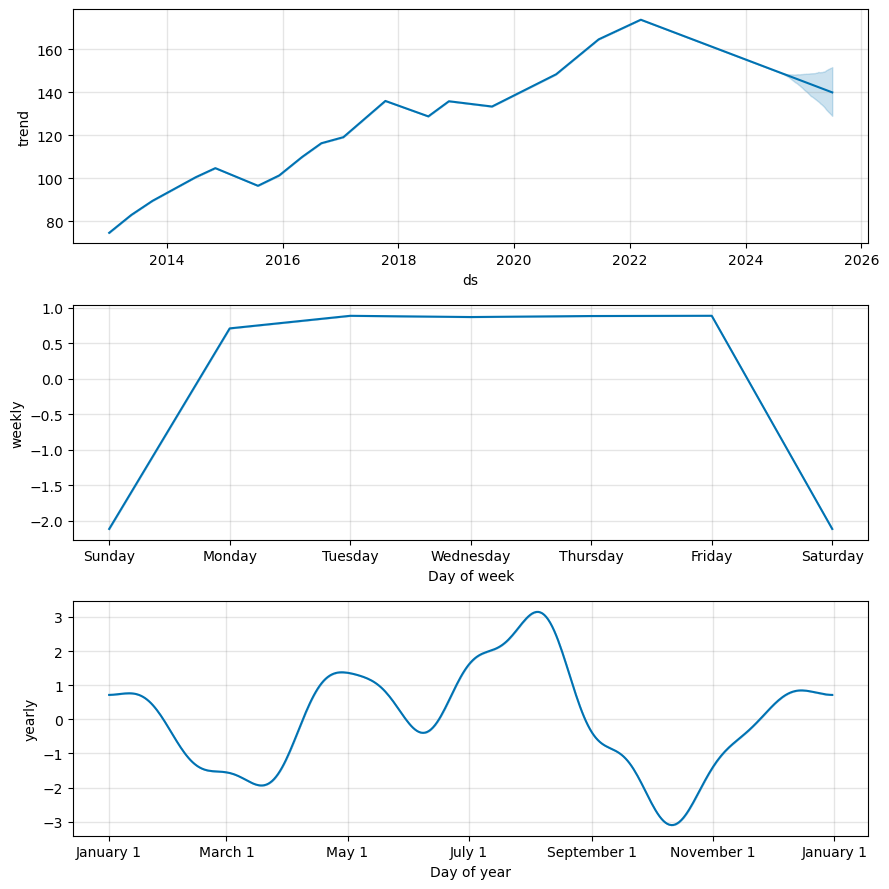

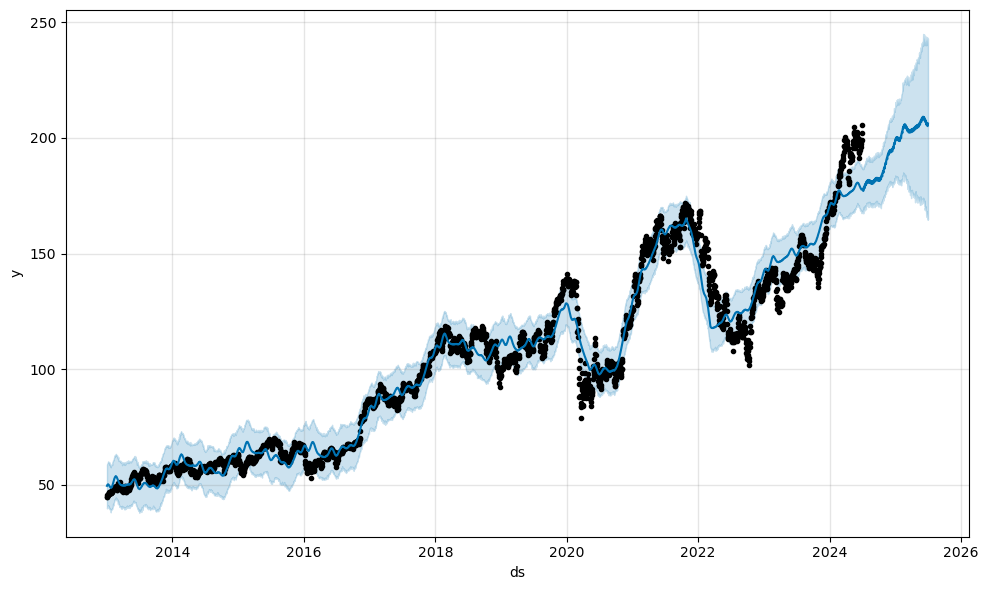

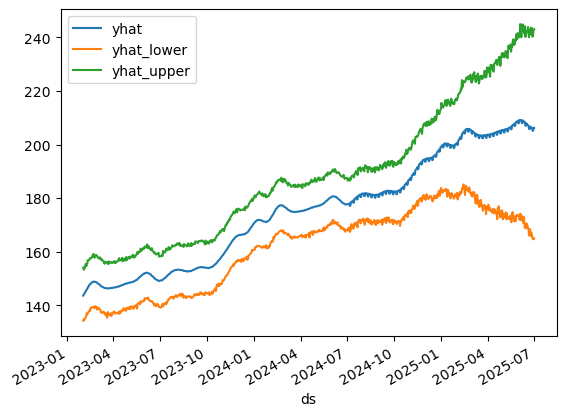

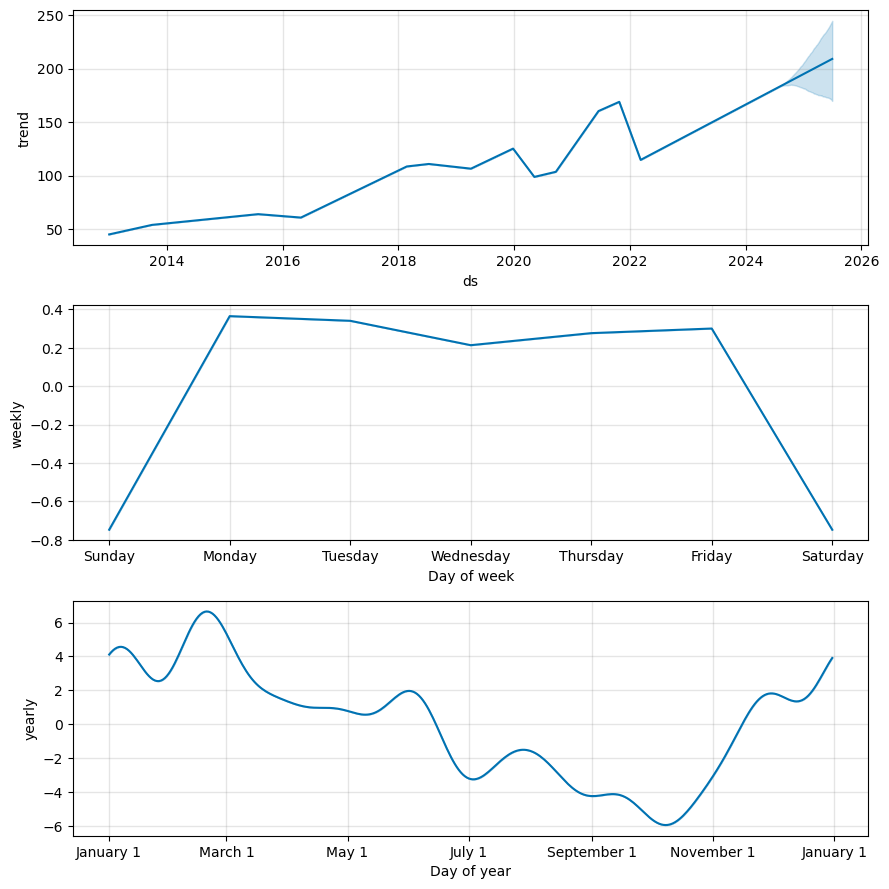

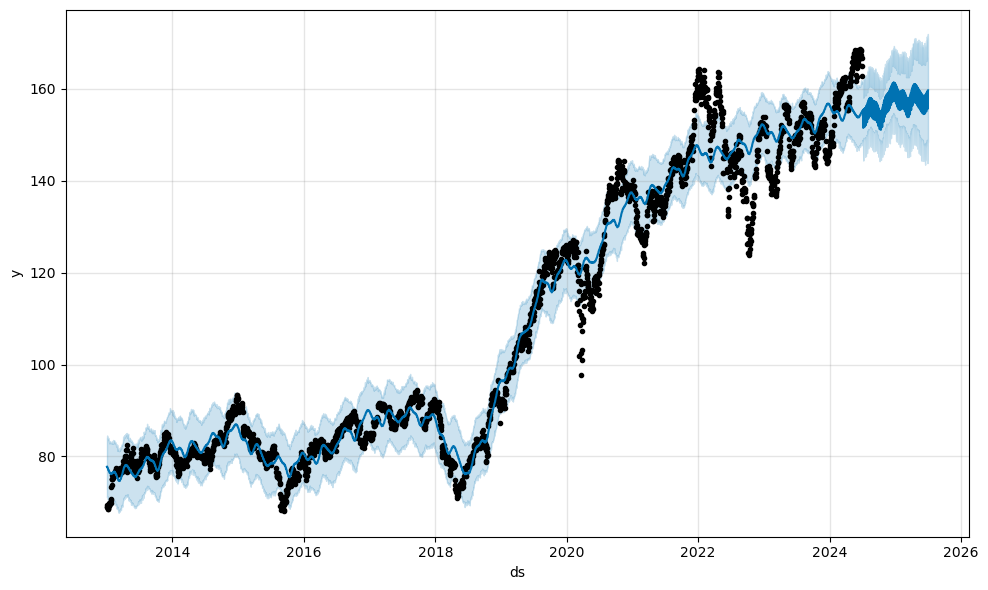

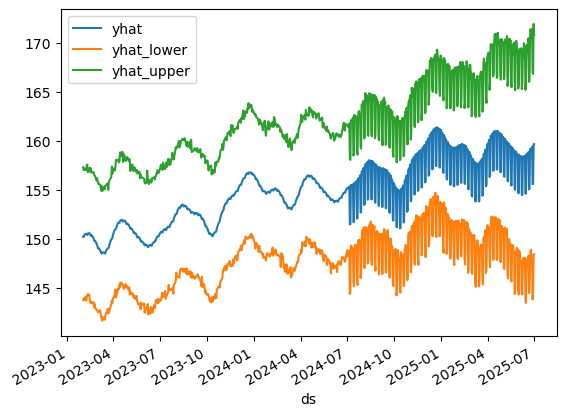

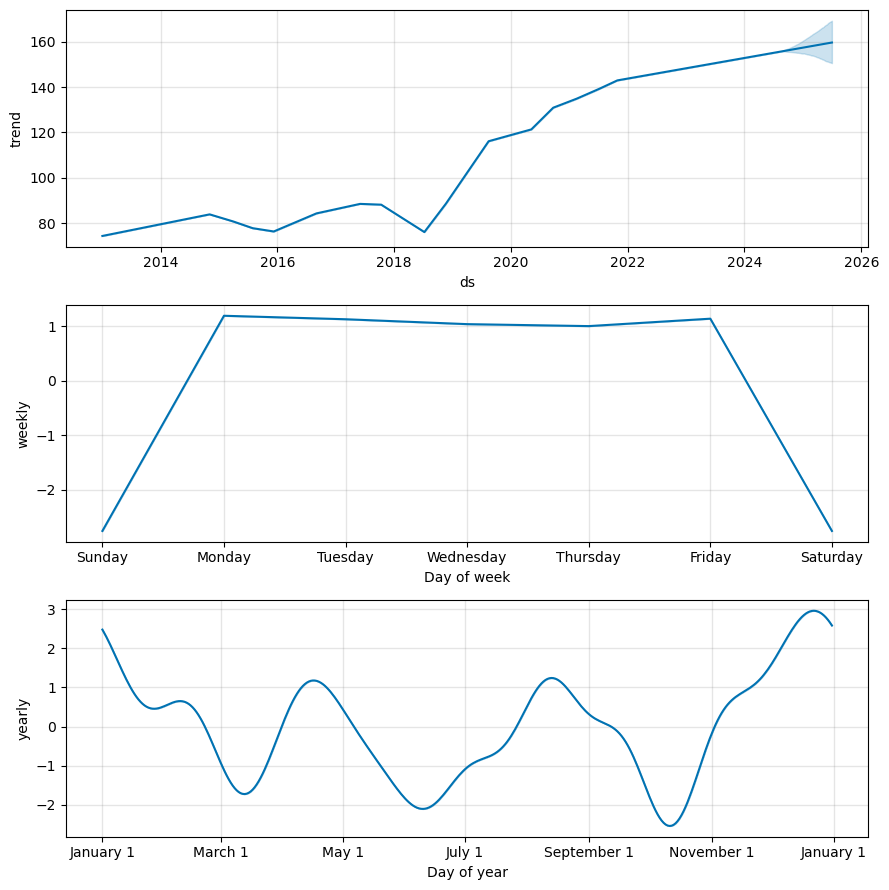

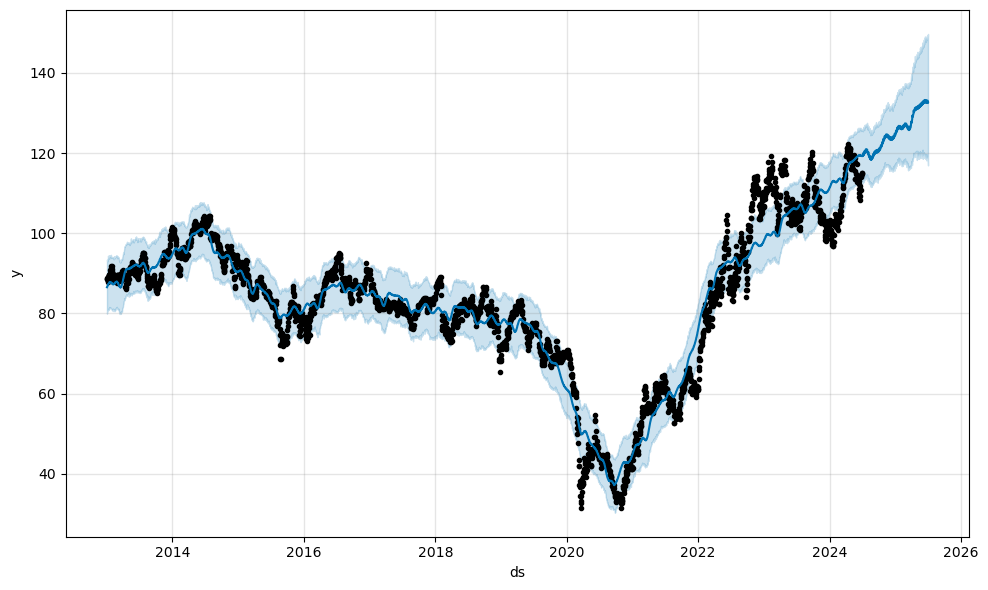

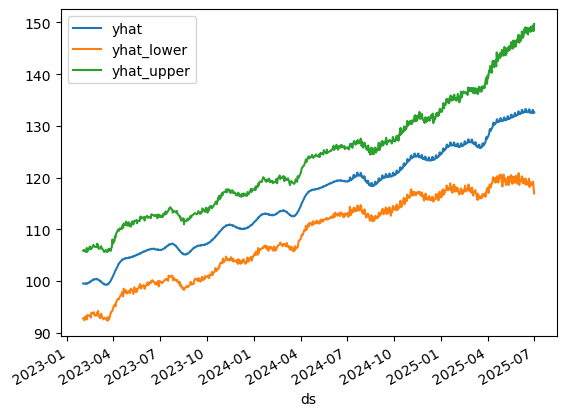

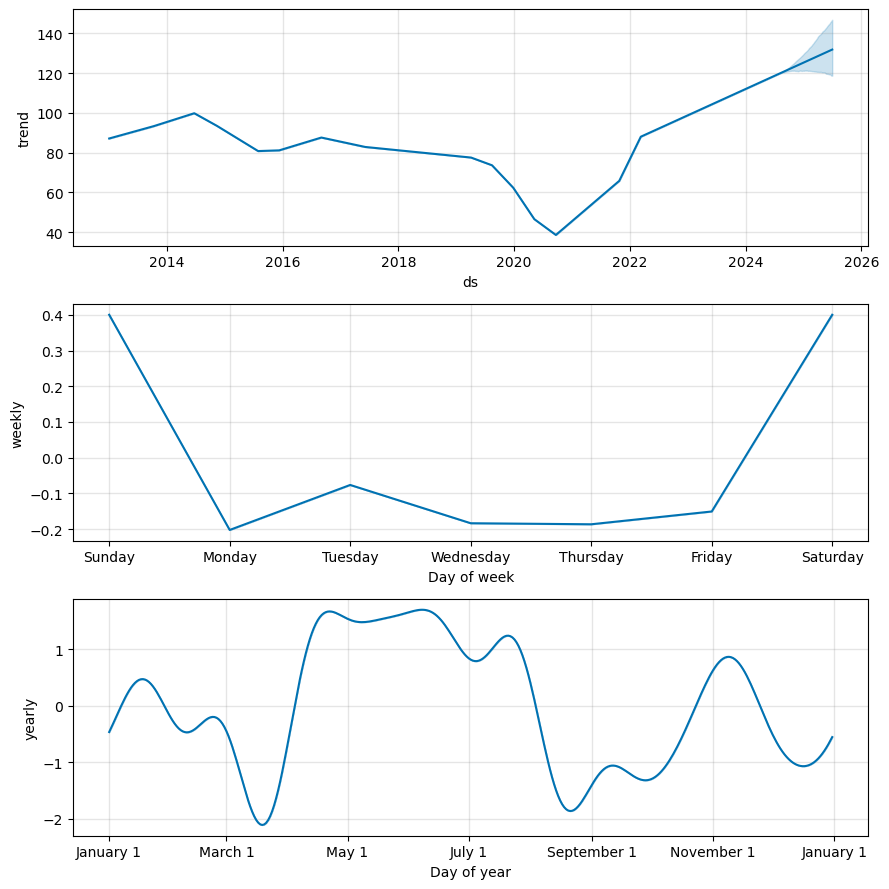

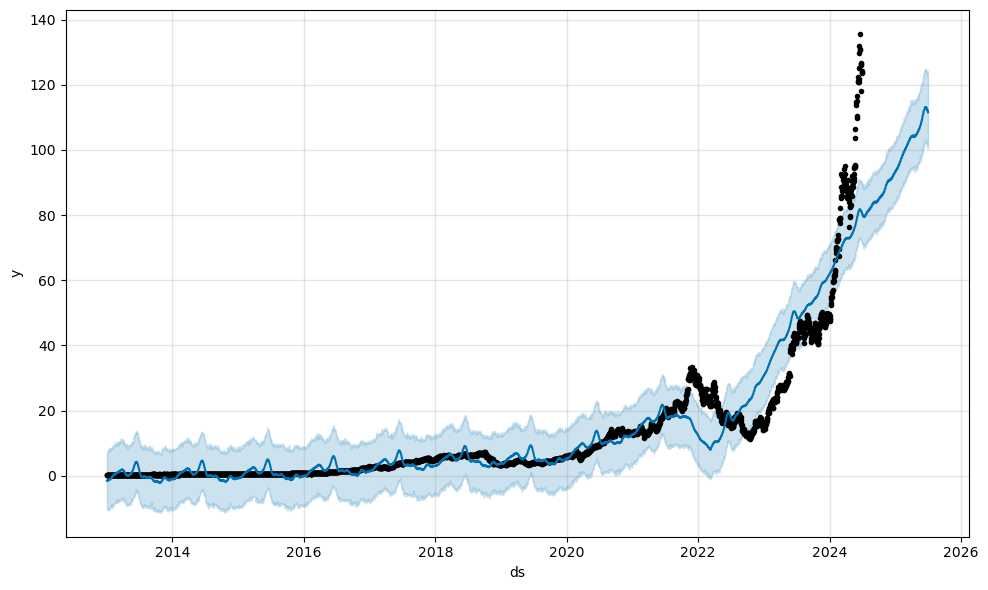

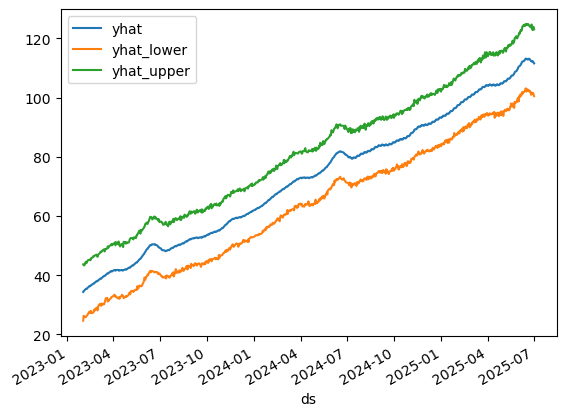

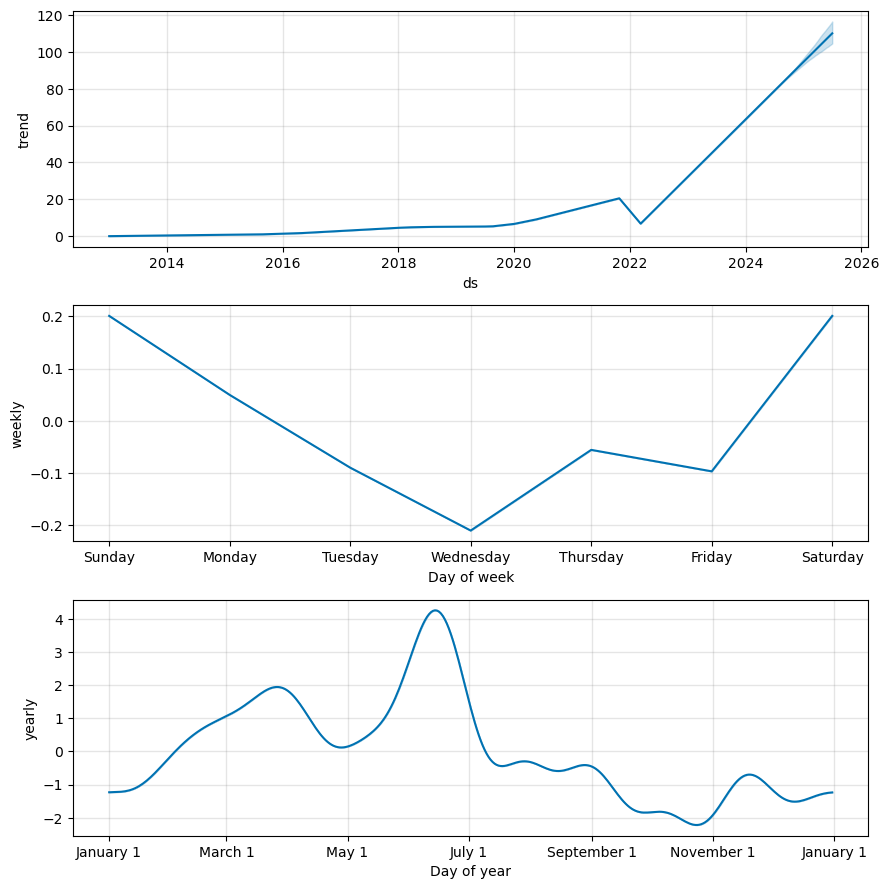

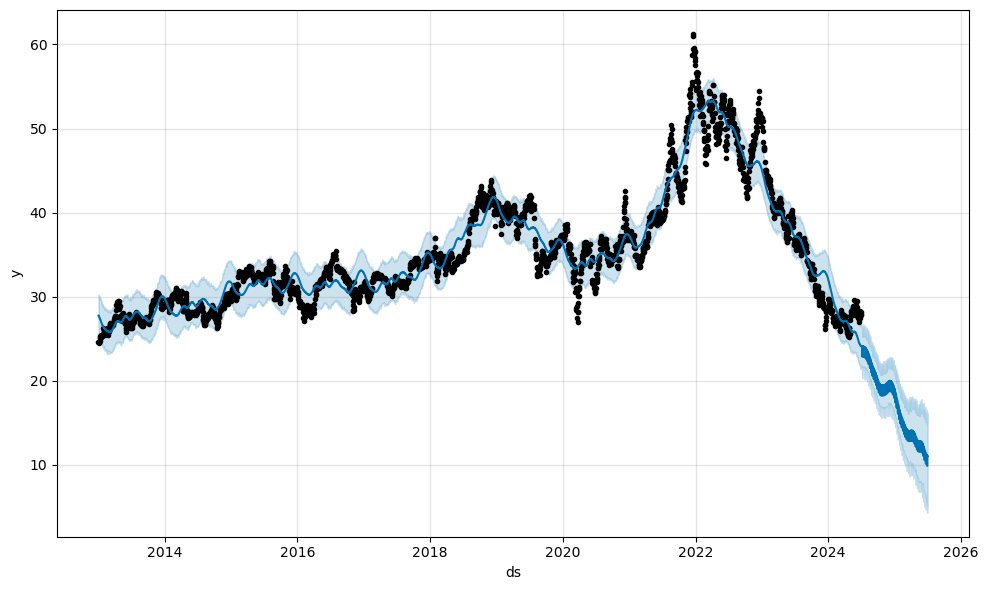

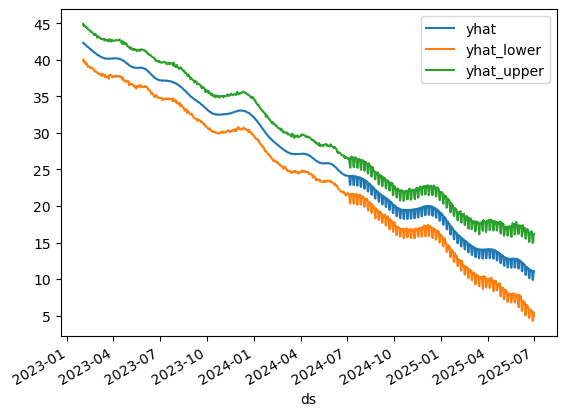

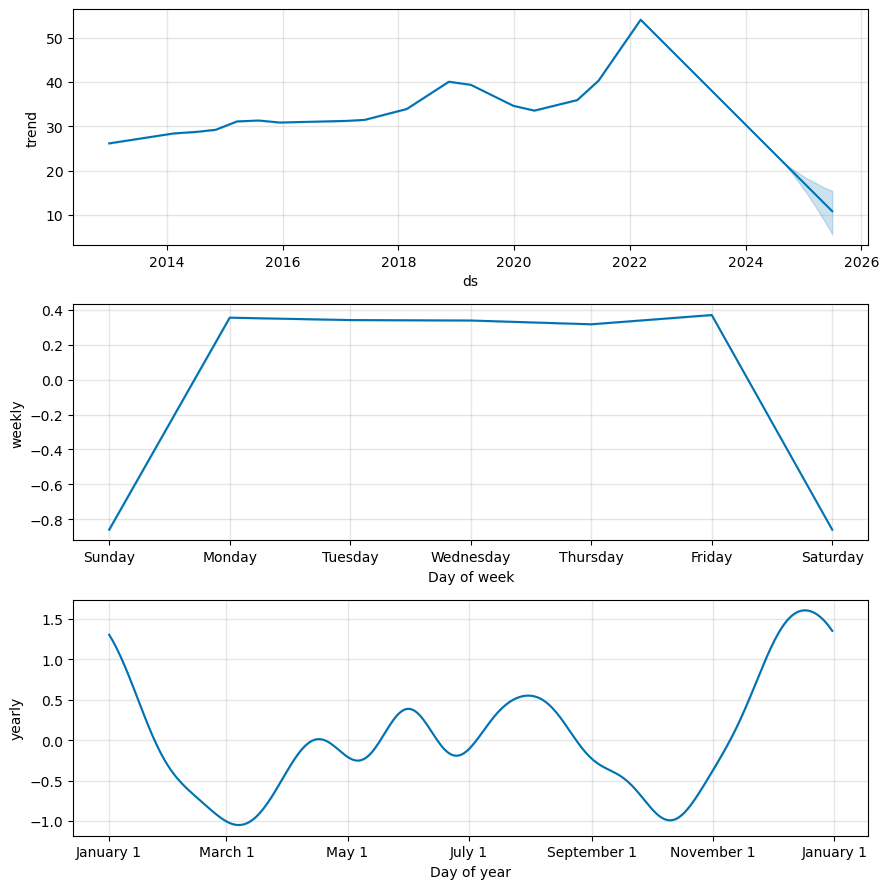

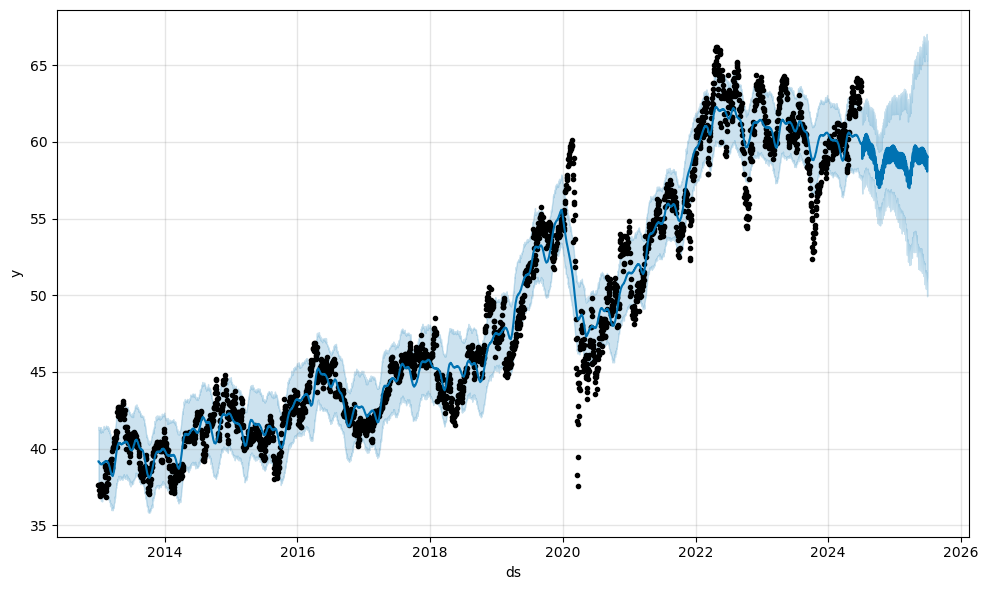

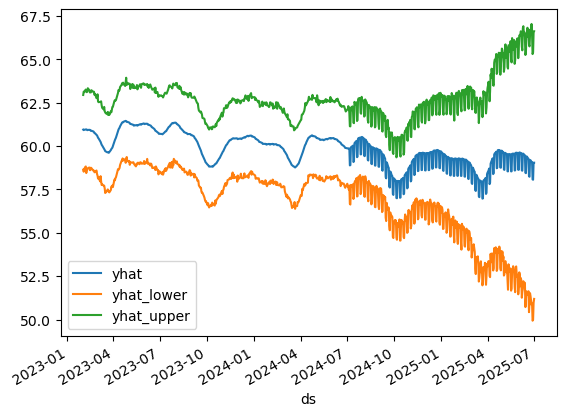

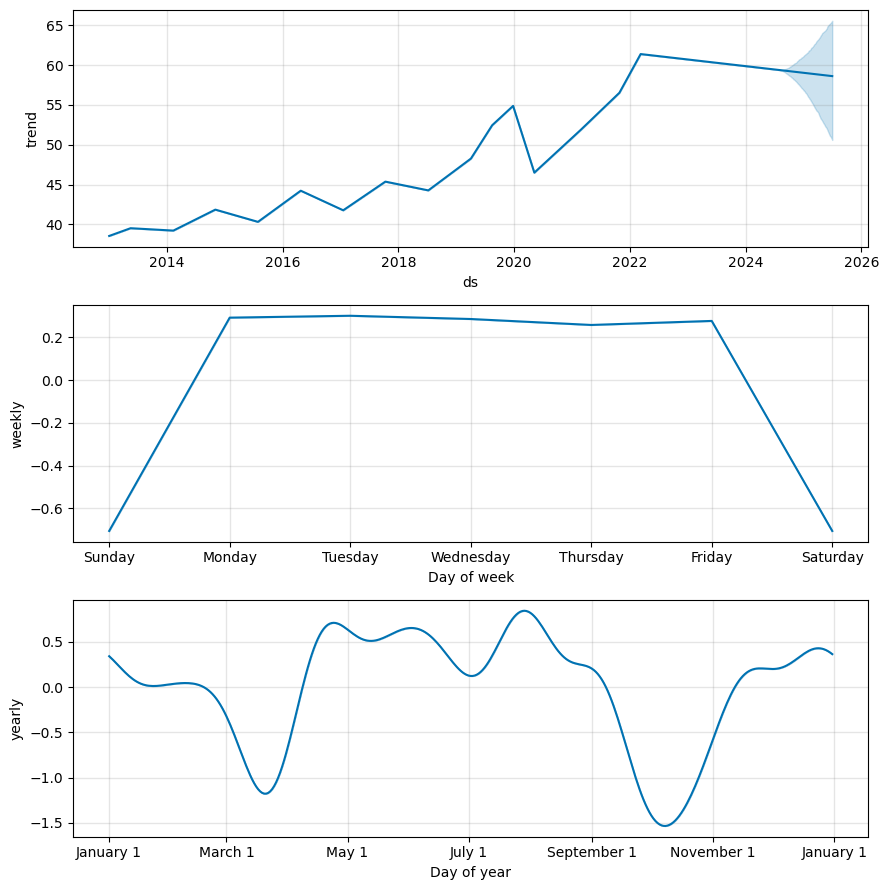

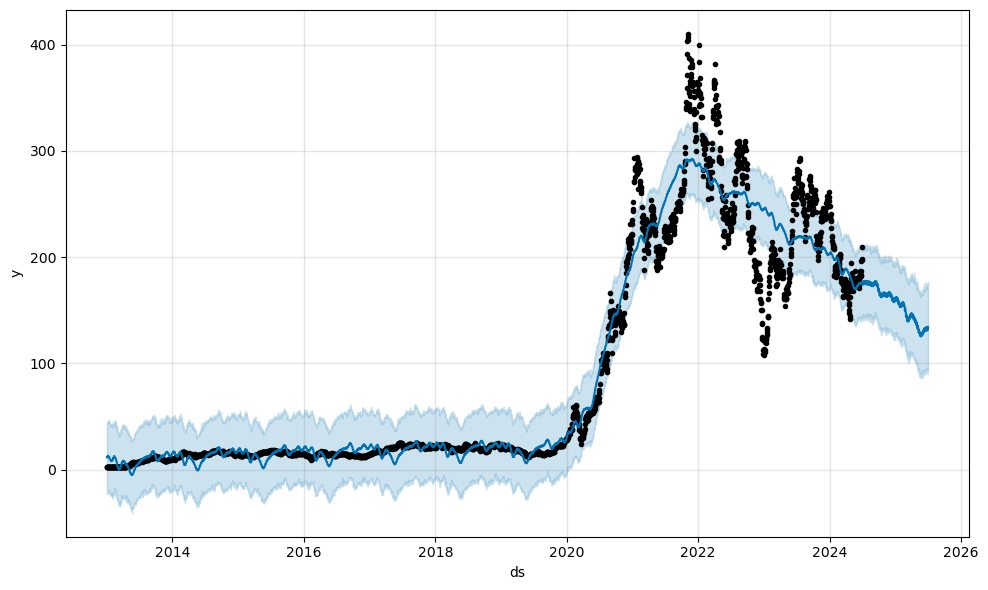

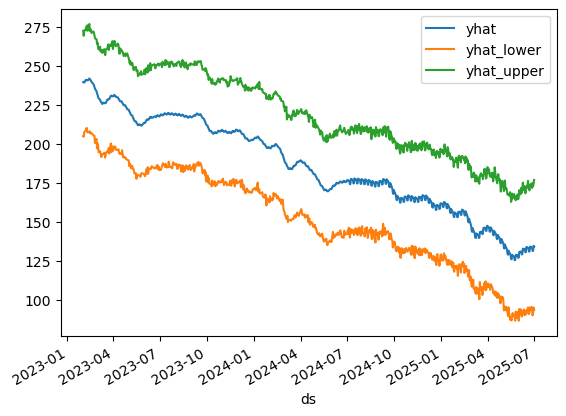

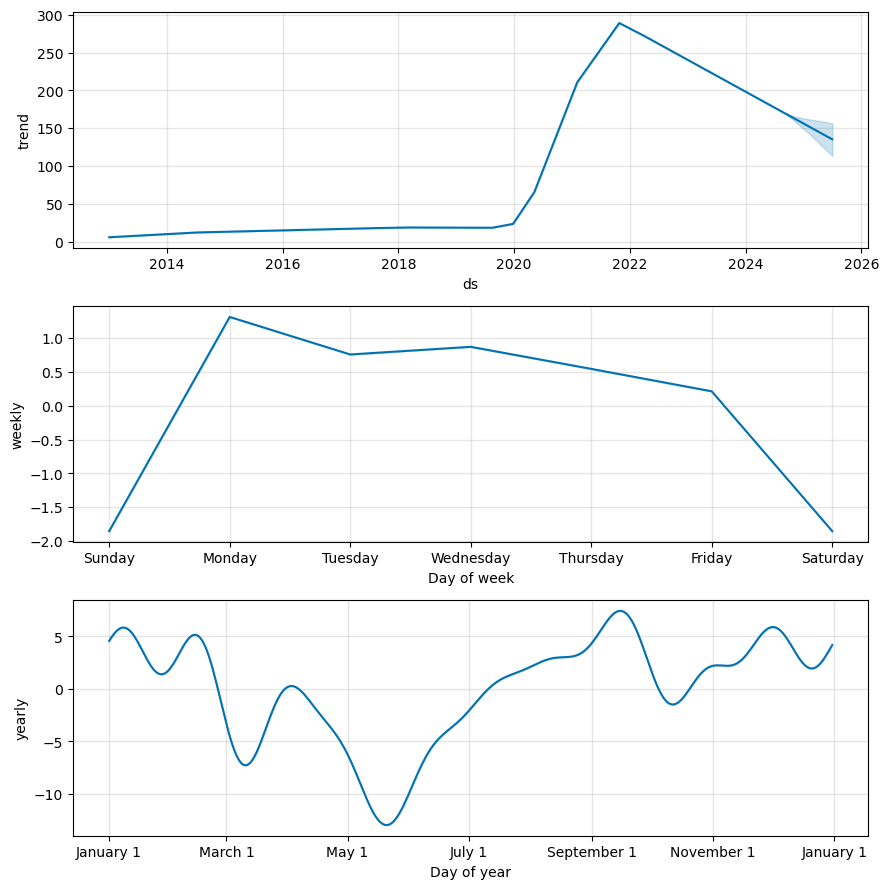

In [25]:
# Train and evaluate models for each ticker
for ticker in tickers:
    print(f'\nEvaluating models for {ticker}')
    train_and_evaluate(ticker, combined_data)